<a href="https://colab.research.google.com/github/gorpo/Bases-python/blob/master/Text_Recognition_Tesseact_Gorpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Texto | Opencv | Pytesseract
Neste notebook abordamos o uso do reconhecimento de textos com Opencv e Pytesseract, no qual este é responsável pela nossa analise de texto, substituindo assim nossos modelos treinados ou haarcascades.


# Instalações e Downloads


In [0]:
#@title Será feito o download do pytesseract e gtts via pip e dos pacotes tesseract-ocr e libtesseract-dev via apt.
from google.colab import output
!pip install pytesseract
!pip install gtts
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
output.clear
!echo Todos arquivos baixados com sucesso.

# Upload de imagens para Análise

 **Upload da imagem via Link:**
<br>Insira um link válido com final .jpg ou .png, em caso de erros  use o sistema de upload de imagens na célula abaixo.

In [0]:
#SISTEMA DE ANALISE DE IMAGENS COM MASCARA COVID19
#download da imagem a ser analisada:

url = "https://i.imgur.com/heVp6Jj.jpg" #@param {type:"string"}

print(url)
import requests
import time

#url = input()
r = requests.get(url)
with open('file.png', 'wb') as f:
    f.write(r.content)
print('Download da imagem concluido com sucesso, inicie o processo de análise...')		




 **Upload de imagens do seu computador:**

In [0]:
#@markdown Rode esta célula e no botão 'Escolher arquivos', selecione a imagem que deseja fazer o upload.

#faça upload da sua imagem do computador

from google.colab import files
import shutil
uploaded = files.upload()
for fn in uploaded.keys():
  print('[INFO] Usuario fez upload do arquivo "{name}" com tamanho {length} bytes\n[INFO] Imagem salva na pasta exemplos/file.png\n[INFO] Upload concluido com sucesso rode a Analise de Imagens.'.format(name=fn, length=len(uploaded[fn])))
shutil.move(fn, 'file.png')

# Análise de imagem 


[Confidencia] 91 | [Texto] estou
[Confidencia] 91 | [Texto] aprendendo
[Confidencia] 96 | [Texto] python
[Confidencia] 92 | [Texto] consigo
[Confidencia] 93 | [Texto] ler
[Confidencia] 92 | [Texto] sozinho
[Confidencia] 96 | [Texto] este
[Confidencia] 96 | [Texto] simples
[Confidencia] 96 | [Texto] texto
[Confidencia] 96 | [Texto] eu
[Confidencia] 93 | [Texto] vou
[Confidencia] 91 | [Texto] dominar
[Confidencia] 89 | [Texto] o
[Confidencia] 96 | [Texto] mundo


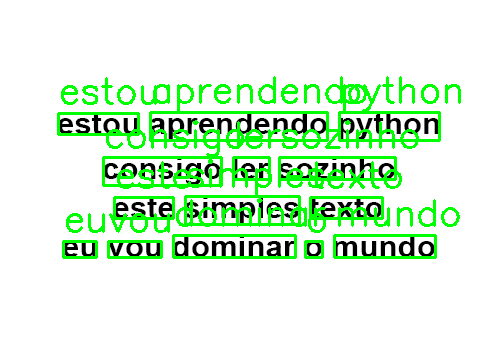

In [71]:
#@title A análise de imagem irá pegar seu arquivo, fazer o reconhecimento de texto com o pysseract manipula-lo no opencv e trazer a resposta final em um arquivo .txt, via terminal e via voz além de uma imagem mostrando os textos reconhecidos.
from google.colab.patches import cv2_imshow
from pytesseract import Output
import pytesseract
import cv2




imagem = cv2.imread('file.png')
rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
resultados = pytesseract.image_to_data(rgb, output_type=Output.DICT)


frase = []
for i in range(0, len(resultados["text"])):
	# extrai as coordenadas da caixa delimitadora da região de texto do resultado atual
	x = resultados["left"][i]
	y = resultados["top"][i]
	w = resultados["width"][i]
	h = resultados["height"][i]
	# extrair o próprio texto do OCR, juntamente com a confiança na localização do texto
	text = resultados["text"][i]
	conf = int(resultados["conf"][i])
	# filtrar localizações de texto de predicção(confiança) fraca/baixa
	if conf > 0:
		# mostra a predicção(confidencia) de cada palavra

		print(f"[Confidencia] {conf} | [Texto] {text}")

		# retira o texto não ASCII para que possamos desenhar o texto na imagem usando o OpenCV e, em seguida, desenhe uma caixa delimitadora ao redor do texto junto com o próprio texto
		text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
		cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)
		cv2.putText(imagem, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
		frase.append(text)

#grava o texto recebido
for i in range(len(frase) +2):
	try:
		texto = open('file.txt','a')
		texto.write(f'{frase[i]} ')
	except:
		pass
texto.write(' \n')
texto.close()

# mostra a imagem
cv2_imshow(imagem)
#cv2.waitKey(0)


# Leitura do texto
Iremos agora fazer a leitura em forma de texto e voz. No final delete os arquivos para não haver erros.

In [0]:
#@title Leitura em texto.
ler = open('file.txt','r')
lido = ler.read()
print(lido)


In [0]:
#@title Leitura por voz via gtts.
from gtts import gTTS 
from IPython.display import Audio 
import time
#le o texto gravado
ler = open('file.txt','r')
lido = ler.read()

tts = gTTS(lido,lang='pt-br') 
tts.save('file.wav') 
sound_file = 'file.wav'
Audio(sound_file, autoplay=True) 


In [0]:
#@title Execute para deletar os arquivos de texto e audio e recomeçar usar o sistema limpo.

import os
os.remove('file.txt')
os.remove('file.wav')

![@GorpoOrko 2020 | tcxsproject.com.br](https://raw.githubusercontent.com/gorpo/Manicomio-Boot-Theme/master/manicomio/boot.png)